In [2]:
import os
import pathlib
import numpy as np
import csv
from collections import Counter
import random
import matplotlib.pyplot as plt

In [3]:
def read_annotation(filename):
    events = []
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            events.append(row)
    return events

In [4]:
events = read_annotation("eq_contributions.csv")
len(events)

1596

In [5]:
words_list = [e[0].lower() for e in events[1:] if e[1] == "English"]
len(words_list)

918

In [6]:
hq_words = ["bright","brittle","clear","crisp","harsh","hollow","sharp","shrill","tinny","woody","big","boom","boxy","dark","dull","fat","full","muddy","muffled","punch","smooth","sweet","warm","flat",
            "crunchy","deep","soothing","clean","airy","cold","metallic","booming"]

len(hq_words)

32

In [7]:
words_list[0:10]

['hot',
 'wet',
 'slow',
 'saucy',
 'heavy',
 'shrill',
 'warm',
 'chill',
 'sharp',
 'corn']

In [8]:
high_rated_words = list(set([e[0].lower() for e in events[1:] if e[1] == "English" and float(e[3]) > 0.7 and e[0].lower() not in hq_words]))
high_rated_words.sort()

In [9]:
high_rated_words

['aggressive',
 'baseball',
 'beautiful',
 'biting',
 'bold',
 'brash',
 'brass',
 'brassy',
 'breezy',
 'calm',
 'caring',
 'cheerful',
 'clarity',
 'cooing',
 'cool',
 'cute',
 'disgusting',
 'down',
 'edge',
 'edgy',
 'enchanting',
 'energetic',
 'energizing',
 'excited',
 'exciting',
 'fancy',
 'fluffy',
 'forceful',
 'frigid',
 'funky',
 'genius',
 'gentle',
 'good',
 'gruff',
 'happy',
 'hard',
 'heart-warming',
 'heat',
 'heavy',
 'hot',
 'huge',
 'icy',
 'jagged',
 'large',
 'light',
 'loud',
 'love',
 'low',
 'mellow',
 'mournful',
 'noisy',
 'passionate',
 'peace',
 'peaceful',
 'pleasing',
 'pleasurable',
 'plodding',
 'poor',
 'punchy',
 'quiet',
 'radiant',
 'relaxing',
 'reserved',
 'rich',
 'romantic',
 'rousing',
 'rumble',
 'serene',
 'sloppy',
 'slow',
 'soft',
 'solemn',
 'splash',
 'squeaking',
 'strong',
 'taco',
 'techno',
 'tense',
 'throbbing',
 'thumpy',
 'thunderous',
 'twangy',
 'velvety',
 'whispered',
 'whispering',
 'wistful']

In [10]:
len(high_rated_words)

86

In [11]:
cc = dict(Counter(words_list))
words_set = list(cc.keys())
words_set.sort()

In [12]:
len(words_set)

388

In [13]:
cc

{'hot': 8,
 'wet': 2,
 'slow': 2,
 'saucy': 1,
 'heavy': 15,
 'shrill': 4,
 'warm': 64,
 'chill': 1,
 'sharp': 8,
 'corn': 1,
 'soft': 29,
 'apple': 1,
 'deep': 6,
 'scary': 5,
 'oxygen': 1,
 'tinny': 8,
 'loud': 26,
 'flat': 3,
 'jarring': 3,
 'prickly': 1,
 'crunchy': 5,
 'excitement': 1,
 'cold': 34,
 'cool': 14,
 'relaxing': 4,
 'hard': 10,
 'light': 6,
 'funky': 4,
 'bright': 19,
 'fast': 5,
 'crisp': 8,
 'pretty': 2,
 'hollow': 3,
 'steep': 1,
 'classic': 2,
 'mellow': 8,
 'dark': 8,
 'tight': 1,
 'boom': 1,
 'sad': 9,
 'sunshine': 1,
 'fuzzy': 1,
 'carefree': 1,
 'woody': 1,
 'crunch': 1,
 'sweet': 5,
 'mournful': 1,
 'ralph': 1,
 'groovy': 1,
 'soothing': 17,
 'happy': 22,
 'damp': 1,
 'tiger': 1,
 'greasy': 1,
 'clear': 12,
 'pleasant': 6,
 'cheerful': 3,
 'creepy': 1,
 'nice': 3,
 'punch': 1,
 'delightful': 1,
 'balanced': 1,
 'car': 1,
 'gradual': 1,
 'calm': 13,
 'pleasing': 2,
 'love': 4,
 'metallic': 2,
 'cat': 2,
 'biting': 1,
 'serene': 3,
 'fast-paced': 1,
 'smooth': 1

Number of frequency bands: 40
Example frequencies: [20.0, 50.0, 83.0, 120.0, 161.0, 208.0, 259.0, 318.0, 383.0, 455.0, 537.0, 628.0, 729.0, 843.0, 971.0, 1114.0, 1273.0, 1452.0, 1652.0, 1875.0, 2126.0, 2406.0, 2719.0, 3070.0, 3462.0, 3901.0, 4392.0, 4941.0, 5556.0, 6244.0, 7014.0, 7875.0, 8839.0, 9917.0, 11124.0, 12474.0, 13984.0, 15675.0, 17566.0, 19682.0]


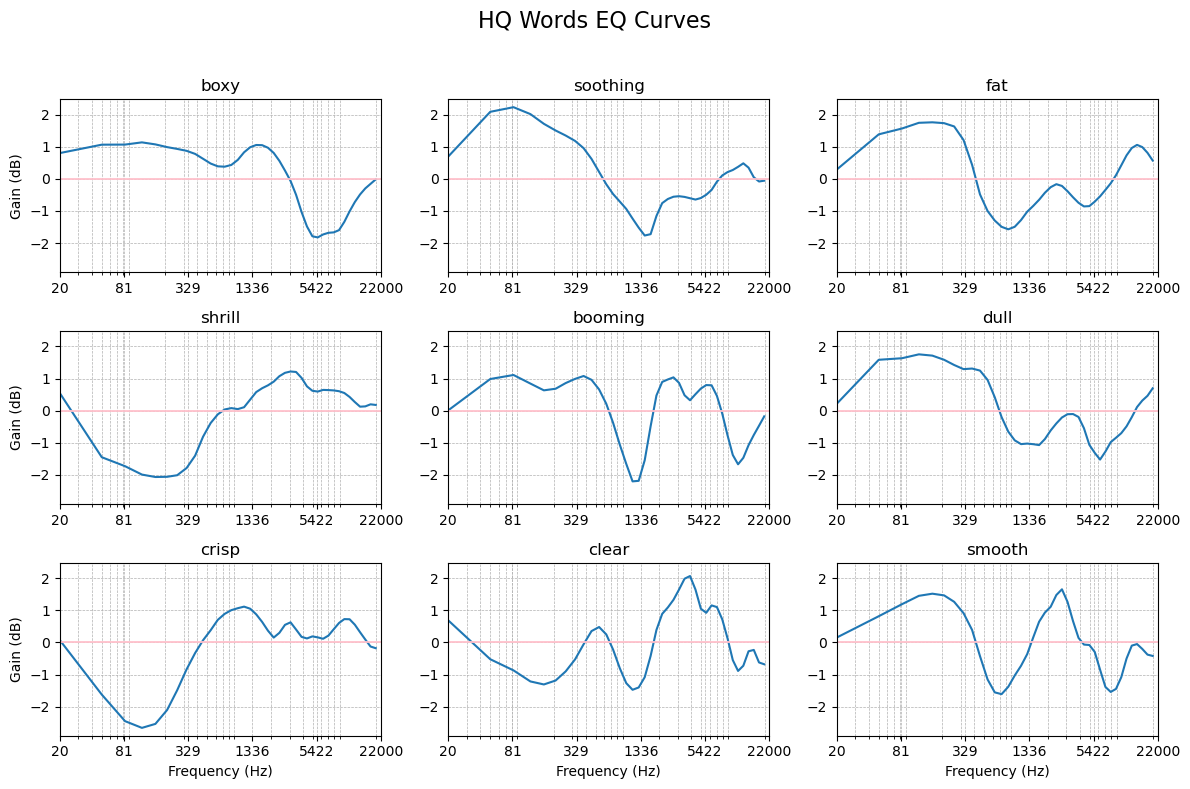

In [16]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import random

hq_words = [
    "bright","brittle","clear","crisp","harsh","hollow","sharp","shrill","tinny","woody",
    "big","boom","boxy","dark","dull","fat","full","muddy","muffled","punch","smooth",
    "sweet","warm","flat","crunchy","deep","soothing","clean","airy","cold","metallic","booming"
]

hq_words9 = random.sample(hq_words, 9)

def load_eq_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        header = next(reader)
        freq_cols = header[3:]
        freq_list = [float(col.replace("RSC_", "").replace("_band", "").replace("Hz", "")) for col in freq_cols]
        eq_curves = {}
        for row in reader:
            if not row:
                continue
            descriptor = row[0].lower().strip()
            gains_str = row[3:-1]
            try:
                gains = [float(g) for g in gains_str]
            except ValueError:
                continue
            eq_curves[descriptor] = gains
        return freq_list, eq_curves

csv_file = "eq_contributions.csv"
freq_list, eq_curves = load_eq_data(csv_file)

print("Number of frequency bands:", len(freq_list))
print("Example frequencies:", freq_list)

fig, axs = plt.subplots(3, 3, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle("HQ Words EQ Curves", fontsize=16)

for i, word in enumerate(hq_words9[:9]):
    row, col = divmod(i, 3)
    ax = axs[row, col]

    w_lower = word.lower()
    if w_lower in eq_curves:
        gains = eq_curves[w_lower]
        ax.plot(freq_list, gains, label=word)
        ax.set_title(word)
    else:
        ax.set_title(f"{word}\n(No data)")

    ax.set_xscale('log')
    ax.set_xlim(20, 22000)

    if row == 2:
        ax.set_xlabel("Frequency (Hz)")
    if col == 0:
        ax.set_ylabel("Gain (dB)")

    ticks = np.logspace(np.log10(20), np.log10(22000), 6)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f"{int(round(t))}" for t in ticks])
    ax.tick_params(labelbottom=True, labelleft=True)
    ax.axhline(y=0, color='pink', linewidth=1.3)

for ax_row in axs:
    for ax in ax_row:
        ax.grid(True, which='both', ls='--', lw=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

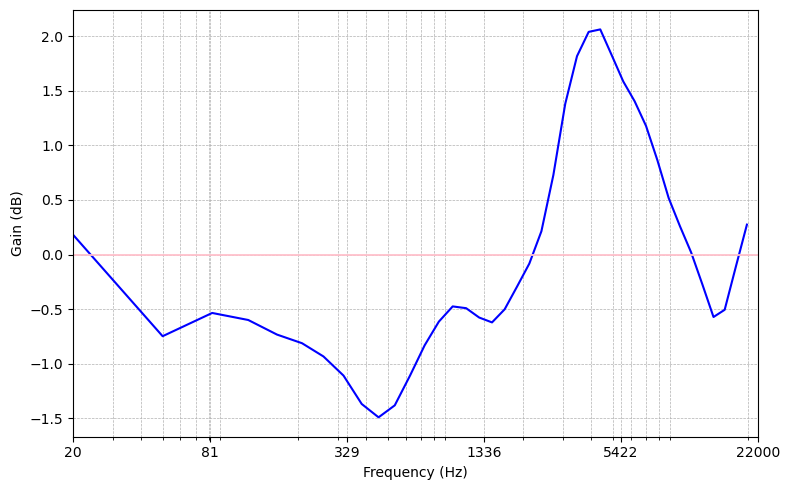

In [23]:
import matplotlib.pyplot as plt
import numpy as np

word = "airy"

if word in eq_curves:
    gains = eq_curves[word]
    
    plt.figure(figsize=(8, 5))
    plt.plot(freq_list, gains, label=word, color='blue')
    plt.xscale('log')
    plt.xlim(20, 22000)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Gain (dB)")
    #plt.title(f"EQ Curve for '{word}'")
    plt.axhline(y=0, color='pink', linewidth=1.3)
    
    ticks = np.logspace(np.log10(20), np.log10(22000), 6)
    plt.xticks(ticks, [f"{int(round(t))}" for t in ticks])
    plt.grid(True, which='both', ls='--', lw=0.5)
    plt.tight_layout()
    plt.show()
else:
    print(f"No EQ data found for word: {word}")